**Mount google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
from pathlib import Path

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img


import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


**Load Data**

In [ ]:
data_dir = Path('/content/drive/MyDrive/Archive/')

train_data_dir = data_dir/'train'
valida_data_dir = data_dir/'val'
test_data_dir = data_dir/'test'

In [ ]:
#Identifying the normal and pneumonia case
normal_case_dir = train_data_dir/'NORMAL'
pneumonia_case_dir = train_data_dir/'PNEUMONIA'
normal_cases = normal_case_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_case_dir.glob('*.jpeg')
train_data = []

#All the normal_cases images in label 0
for img in normal_cases:
    train_data.append((img,0))

# All the pneumonia cases images in label 1
for img in pneumonia_cases:
    train_data.append((img,1))

In [ ]:
#putting image and label data
train_data=pd.DataFrame(train_data, columns=['image','label'],index=None)

train_data.head()

,image,label
0,/content/drive/MyDrive/Archive/train/NORMAL/NO...,0
1,/content/drive/MyDrive/Archive/train/NORMAL/IM...,0
2,/content/drive/MyDrive/Archive/train/NORMAL/NO...,0
3,/content/drive/MyDrive/Archive/train/NORMAL/NO...,0
4,/content/drive/MyDrive/Archive/train/NORMAL/NO...,0


In [ ]:
#normal and pneumonia case dir
normal_case_dir = valida_data_dir/'NORMAL'
pneumonia_case_dir = valida_data_dir/'PNEUMONIA'

In [ ]:
#Identifying normal and pneumonia case
normal_cases = normal_case_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_case_dir.glob('*.jpeg')
validation_data = []

#All the images for level 0
for img in normal_cases:
    validation_data.append((img,0))

#All the images for level 1
for img in pneumonia_cases:
    validation_data.append((img, 1))

In [ ]:
#Putting validation image and label data
val_data=pd.DataFrame(validation_data, columns=['image', 'label'])
val_data.head()

,image,label
0,/content/drive/MyDrive/Archive/val/NORMAL/NORM...,0
1,/content/drive/MyDrive/Archive/val/NORMAL/NORM...,0
2,/content/drive/MyDrive/Archive/val/NORMAL/NORM...,0
3,/content/drive/MyDrive/Archive/val/NORMAL/NORM...,0
4,/content/drive/MyDrive/Archive/val/NORMAL/NORM...,0


In [ ]:
#Getting the test image data
test_path = os.path.join(data_dir,"test")
test_normal = glob.glob(test_path +"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path +"/PNEUMONIA/*.jpeg")

In [ ]:
#Putting the test image and label
test_data=[]

#All the imges in lebel 0
for img in test_normal:
    test_data.append((img, 0))

# All the images in label 1
for img in test_pneumonia:
    test_data.append((img, 1))

In [ ]:
#Test image and label data
test_data=pd.DataFrame(test_data, columns=['images', 'label'], index=None)

In [ ]:
#Displaying the test data
test_data.head()

,images,label
0,/content/drive/MyDrive/Archive/test/NORMAL/NOR...,0
1,/content/drive/MyDrive/Archive/test/NORMAL/NOR...,0
2,/content/drive/MyDrive/Archive/test/NORMAL/IM-...,0
3,/content/drive/MyDrive/Archive/test/NORMAL/NOR...,0
4,/content/drive/MyDrive/Archive/test/NORMAL/NOR...,0


**Build the model**

In [ ]:
#Building the CNN model
model=tf.keras.Sequential()

#Defining the CNN input
model.add(tf.keras.Input(shape=(150,150,3)))

#Convolutional
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,padding='same', activation='relu'))

#Convolutional
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides= (2,2),padding='same', activation='relu'))

#Pooling
model.add(tf.keras.layers.MaxPool2D())

#Convolutional
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3),strides = 1,padding='same', activation='relu'))

#Pooling
model.add(tf.keras.layers.MaxPool2D())

In [ ]:
#Flatten the layer
model.add(tf.keras.layers.Flatten())
#Fully Connected Layers
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

#output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 41472)             0

**Compile the model**

In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

**Data augmentation**

In [ ]:
train_dtgen=ImageDataGenerator(rescale=1. / 255,      # Normalize colour intensities in 0-1 range
                              shear_range=0.2,       # Shear varies from 0-0.2
                              zoom_range=0.2,
                              horizontal_flip=True,)

In [ ]:
#Fitting the CNN to the images
#The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_generator=train_dtgen.flow_from_directory("/content/drive/MyDrive/Archive/train",
                                               batch_size=32,
                                                target_size = (150, 150),
                                                class_mode = 'binary'
                                               )

Found 5216 images belonging to 2 classes.


In [ ]:
#The validation ImageDataGenerator augments image by iterating through image to CNN
test_datagen=ImageDataGenerator(rescale = 1./255)
validation_generator=test_datagen.flow_from_directory("/content/drive/MyDrive/Archive/val",
                                               batch_size=64,
                                                target_size = (150, 150),
                                                class_mode = 'binary'
                                               )
len(validation_generator)

Found 16 images belonging to 2 classes.


1

In [ ]:
#The test ImageDataGenerator augments image by iterating through image to CNN
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/Archive/test",
                                               batch_size=30,
                                                target_size = (150, 150),
                                                class_mode = 'binary'
                                               )

Found 624 images belonging to 2 classes.


**Fit the model**

In [ ]:
batch_size = 32

# Define the number of training steps
nb_train_steps = len(train_data)//batch_size
nb_train_steps

163

In [ ]:
#Fitting the CNN model
cnn_model=model.fit(train_generator,
          steps_per_epoch = nb_train_steps,
          epochs = 10,
          batch_size = 32,
          validation_data=validation_generator
        )

Epoch 1/10
163/163 [==============================] - 103s 566ms/step - loss: 0.1106 - accuracy: 0.9618 - val_loss: 0.0733 - val_accuracy: 1.0000
Epoch 2/10
163/163 [==============================] - 89s 544ms/step - loss: 0.1099 - accuracy: 0.9597 - val_loss: 1.4531 - val_accuracy: 0.5625
Epoch 3/10
163/163 [==============================] - 91s 557ms/step - loss: 0.1102 - accuracy: 0.9592 - val_loss: 0.3707 - val_accuracy: 0.7500
Epoch 4/10
163/163 [==============================] - 90s 550ms/step - loss: 0.1061 - accuracy: 0.9609 - val_loss: 0.7594 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 91s 556ms/step - loss: 0.0956 - accuracy: 0.9634 - val_loss: 0.1969 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 91s 558ms/step - loss: 0.0911 - accuracy: 0.9668 - val_loss: 0.2500 - val_accuracy: 0.8750
Epoch 7/10
163/163 [==============================] - 91s 558ms/step - loss: 0.1030 - accuracy: 0.9624 - val_loss: 0.1689 - val_a

**Evaluate the model**

In [ ]:
test_loss, test_acc = model.evaluate(test_set, steps=len(test_set))

print("test data accuracy: {:.2f}%".format(test_acc * 100))

21/21 [==============================] - 6s 290ms/step - loss: 0.9097 - accuracy: 0.8301
test data accuracy: 83.01%


In [ ]:
#Predicting the CNN model
test_accu=model.predict(test_set)
test_accu[:5]

21/21 [==============================] - 8s 357ms/step


array([[0.9999987],
       [0.9998559],
       [1.       ],
       [0.999972 ],
       [0.9977737]], dtype=float32)

In [ ]:
test_classes = (test_accu > 0.5).astype(int)
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(test_set.classes, test_classes))
print("Confusion Matrix:\n", confusion_matrix(test_set.classes, test_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.23      0.30       234
           1       0.64      0.81      0.71       390

    accuracy                           0.59       624
   macro avg       0.53      0.52      0.50       624
weighted avg       0.55      0.59      0.56       624

Confusion Matrix:
 [[ 54 180]
 [ 76 314]]


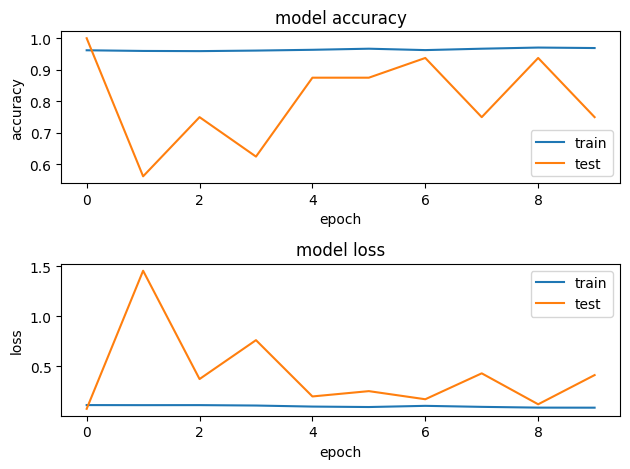

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(cnn_model.history['loss'])
plt.plot(cnn_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [ ]:
# batch of (images, image_labels)
im = test_set    # Get iterator
images = next(im)      # Get images
images[0].shape

(30, 150, 150, 3)

In [ ]:
# Make predictions
results = model.predict(images[0])

# Plot the images and check with results
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.figure(figsize= (20,20))
for i in range(results.shape[0]):
    plt.subplot(8,8,i+1)
    _=imshow(images[0][i]) ;

plt.show() ;